# Image Manipulation with Linear Algebra

### Reading and Displaying Image:

In [14]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

In [15]:
class Image:
  def __init__(self, path):
    self.img = cv2.imread('/content/photo_2023-12-04_23-33-41.jpg')

  def set_image(self, path):
    self.img = cv2.imread('/content/photo_2023-12-04_23-33-41.jpg')

  def get_image(self):
    return self.img

  def show(self, image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  def resize(self, scale, img):
    original_height, original_width = img.shape[:2]
    new_height = int(original_height * scale)
    new_width = int(original_width * scale)
    resized_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    x_scale = original_width / new_width
    y_scale = original_height / new_height

    for y in range(new_height):
        for x in range(new_width):
            original_x = int(x * x_scale)
            original_y = int(y * y_scale)

            resized_image[y, x] = img[original_y, original_x]
    return resized_image
  def rotation(self, angle, img):
    height, width = img.shape[:2]
    angle_radians = math.radians(angle)
    rotation_matrix = np.array([
        [math.cos(angle_radians), -math.sin(angle_radians)],
        [math.sin(angle_radians), math.cos(angle_radians)]
    ])
    rotated_image = np.zeros_like(img, dtype=np.uint8)

    center_x = width // 2
    center_y = height // 2

    for y in range(height):
        for x in range(width):
            translated_x = x - center_x
            translated_y = y - center_y
            rotated_x, rotated_y = np.dot(rotation_matrix, [translated_x, translated_y])

            rotated_x = int(rotated_x + center_x)
            rotated_y = int(rotated_y + center_y)

            if 0 <= rotated_x < width and 0 <= rotated_y < height:
                rotated_image[y, x] = img[rotated_y, rotated_x]
    return rotated_image

  def blur(self, kernel_size, img):
    height, width, channels = img.shape

    blur_kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)

    blurred_image = np.zeros_like(img, dtype=np.uint8)

    for c in range(channels):
        for y in range(1, height - 1):
            for x in range(1, width - 1):
                roi = img[y-1:y+2, x-1:x+2, c]

                pixel_value = np.sum(roi * blur_kernel)

                blurred_image[y, x, c] = int(pixel_value)
    return blurred_image

  def sharpening(self, img):
    height, width, channels = img.shape

    sharpening_kernel = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])

    sharpened_image = np.zeros_like(img, dtype=np.uint8)

    for c in range(channels):
        for y in range(1, height - 1):
            for x in range(1, width - 1):
                roi = img[y-1:y+2, x-1:x+2, c]

                pixel_value = np.sum(roi * sharpening_kernel)

                pixel_value = np.clip(pixel_value, 0, 255)

                sharpened_image[y, x, c] = int(pixel_value)
    return sharpened_image


  def edge_detect(self, img):
    height, width, channels = img.shape

    edge_detection_kernel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    edge_detection_kernel_y = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])

    edge_detected_image = np.zeros_like(img, dtype=np.uint8)

    for c in range(channels):
        for y in range(1, height - 1):
            for x in range(1, width - 1):
                roi = img[y-1:y+2, x-1:x+2, c]
                pixel_value_x = np.sum(roi * edge_detection_kernel_x)
                pixel_value_y = np.sum(roi * edge_detection_kernel_y)
                magnitude = np.sqrt(pixel_value_x**2 + pixel_value_y**2)
                magnitude = np.clip(magnitude, 0, 255)
                edge_detected_image[y, x, c] = int(magnitude)
    return edge_detected_image

  def grayscale_conv(self, img):
    height, width, channels = img.shape

    grayscale_image = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            r, g, b = img[y, x]

            luminance = int(0.33 * r + 0.34 * g + 0.33 * b)
            grayscale_image[y, x] = luminance
    return grayscale_image

  def inversion(self, img):
    height, width, channels = img.shape

    inverted_image = np.zeros_like(img, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            b, g, r = img[y, x]

            inverted_b = 255 - b
            inverted_g = 255 - g
            inverted_r = 255 - r

            inverted_image[y, x] = [inverted_b, inverted_g, inverted_r]
    return inverted_image

  def color_balance(self, img, red_scale, green_scale, blue_scale):
    height, width, channels = img.shape

    adjusted_image = np.zeros_like(img, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            b, g, r = img[y, x]

            adjusted_b = int(blue_scale * b)
            adjusted_g = int(green_scale * g)
            adjusted_r = int(red_scale * r)

            adjusted_b = np.clip(adjusted_b, 0, 255)
            adjusted_g = np.clip(adjusted_g, 0, 255)
            adjusted_r = np.clip(adjusted_r, 0, 255)

            adjusted_image[y, x] = [adjusted_b, adjusted_g, adjusted_r]
    return adjusted_image


In [16]:
image = Image('/content/photo_2023-12-04_23-33-41.jpg')

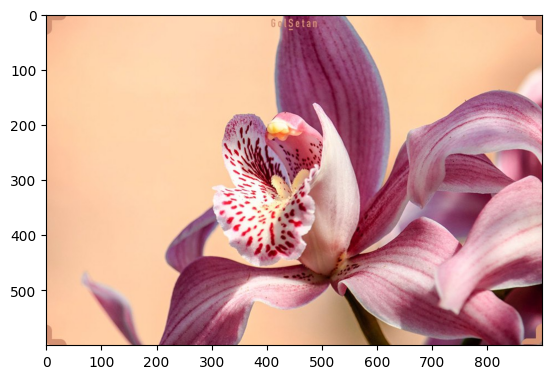

In [17]:
image.show(image.get_image())

### Image Resizing:

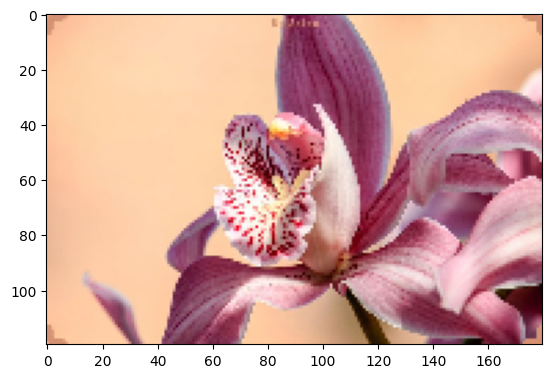

In [18]:
image.show(image.resize(0.2, image.get_image()))

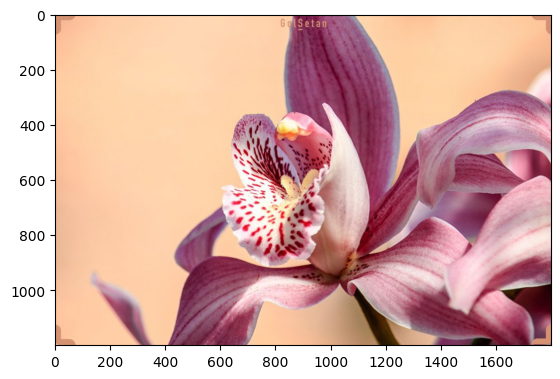

In [19]:
image.show(image.resize(2, image.get_image()))

### Image Rotation

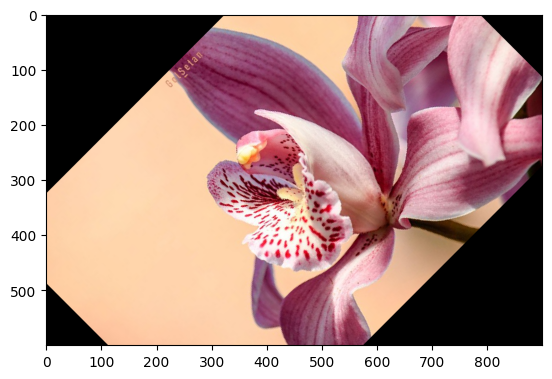

In [20]:
image.show(image.rotation(45, image.get_image()))

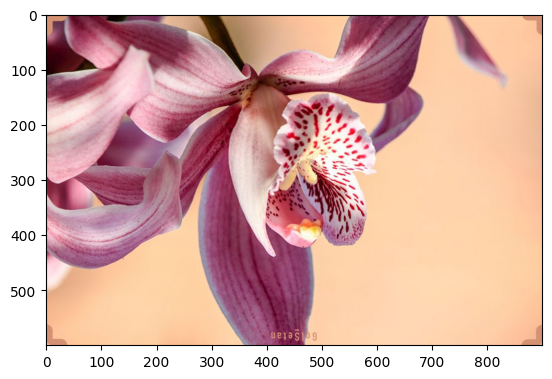

In [21]:
image.show(image.rotation(180, image.get_image()))

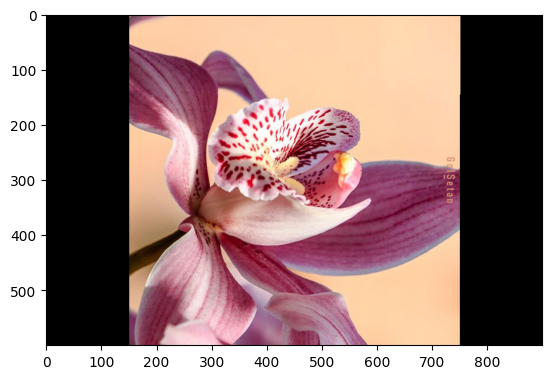

In [22]:
image.show(image.rotation(270, image.get_image()))

### Image Filtering

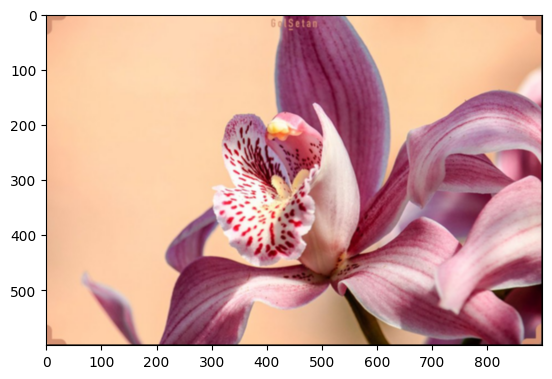

In [23]:
image.show(image.blur(3, image.get_image()))

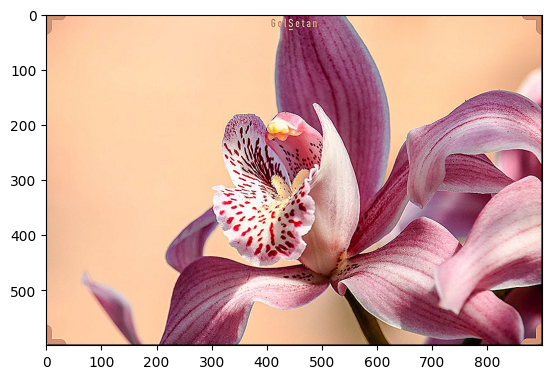

In [24]:
image.show(image.sharpening(image.get_image()))

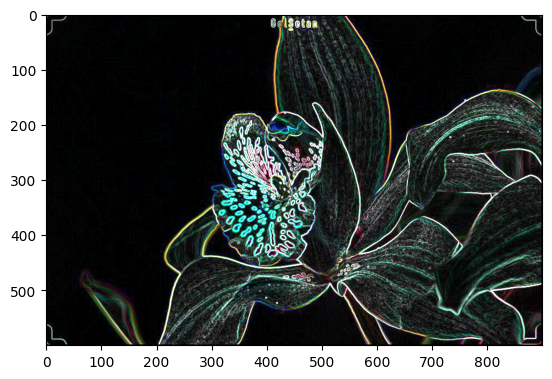

In [25]:
image.show(image.edge_detect(image.get_image()))

### Color Manipulation

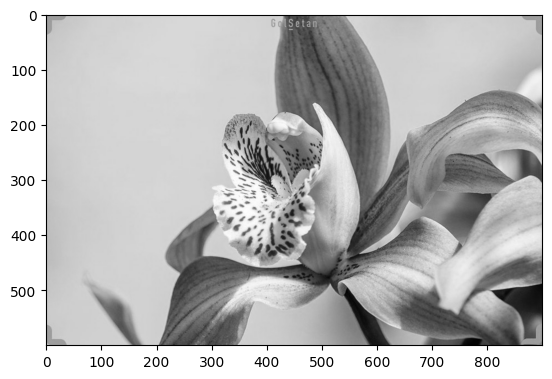

In [26]:
image.show(image.grayscale_conv(image.get_image()))

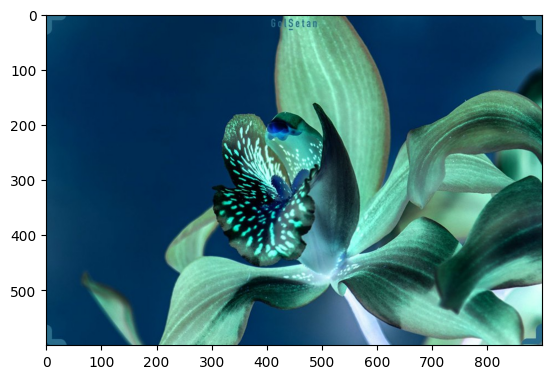

In [27]:
image.show(image.inversion(image.get_image()))

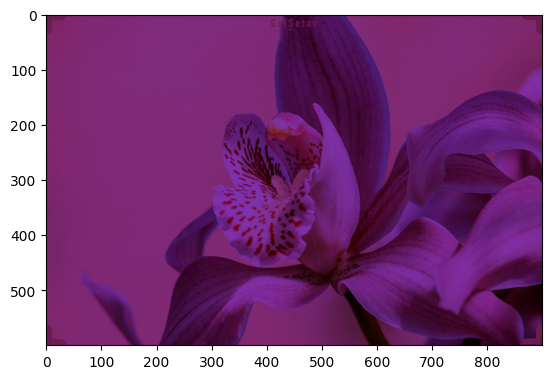

In [28]:
image.show(image.color_balance(image.get_image(), 0.5, 0.2, 0.7))

# Report

The `Image` class provides various image processing operations and transformations. It contains the following methods:

## `__init__(self, path)`
- Initializes the `Image` object with an image loaded from the specified `path`.
- Uses the OpenCV library (`cv2`) to read the image from the file.
- The loaded image is stored in the `self.img` attribute.

## `set_image(self, path)`
- Sets the image of the `Image` object to a new image loaded from the specified `path`.
- Similar to the `__init__` method, it uses OpenCV to read the image.

## `get_image(self)`
- Returns the image stored in the `self.img` attribute.

## `show(self, image)`
- Displays the specified image using `matplotlib` library.
- Converts the image from BGR to RGB color space using `cv2.cvtColor` before showing.

## `resize(self, scale, img)`
- Resizes the specified image by the given scale factor.
- Calculates the new dimensions based on the original dimensions and the scale factor.
- Creates a new blank image with the new dimensions.
- Iterates over each pixel of the new image and maps it to the corresponding pixel in the original image using bilinear interpolation.
- Returns the resized image.

## `rotation(self, angle, img)`
- Rotates the specified image by the given angle in degrees.
- Calculates the rotation matrix based on the angle.
- Creates a new blank image with the same dimensions as the original image.
- Iterates over each pixel of the new image and maps it to the corresponding pixel in the original image using rotation and translation.
- Returns the rotated image.

## `blur(self, kernel_size, img)`
- Applies a blur effect to the specified image using a kernel of the specified size.
- Creates a blur kernel by normalizing a matrix of ones with the specified kernel size.
- Creates a new blank image with the same dimensions as the original image.
- Iterates over each pixel of the new image and applies the blur kernel to the corresponding neighborhood of pixels in the original image.
- Returns the blurred image.

## `sharpening(self, img)`
- Enhances the sharpness of the specified image.
- Creates a sharpening kernel with predefined values.
- Creates a new blank image with the same dimensions as the original image.
- Iterates over each pixel of the new image and applies the sharpening kernel to the corresponding neighborhood of pixels in the original image.
- Clips the pixel values to the range [0, 255].
- Returns the sharpened image.

## `edge_detect(self, img)`
- Detects edges in the specified image using the Sobel operator.
- Creates separate kernels for horizontal and vertical edge detection.
- Creates a new blank image with the same dimensions as the original image.
- Iterates over each pixel of the new image and applies the edge detection kernels to the corresponding neighborhood of pixels in the original image.
- Computes the magnitude of the gradient and clips it to the range [0, 255].
- Returns the edge-detected image.

## `grayscale_conv(self, img)`
- Converts the specified image to grayscale.
- Creates a new blank grayscale image with the same dimensions as the original image.
- Iterates over each pixel of the new image and calculates the luminance value by applying predefined weights to the RGB channels of the original image.
- Returns the grayscale image.

## `inversion(self, img)`
- Inverts the colors of the specified image.
- Creates a new blank image with the same dimensions as the original image.
- Iterates over each pixel of the new image and subtracts the RGB values from 255 to get the inverted colors.
- Returns the inverted image.

## `color_balance(self, img, red_scale, green_scale, blue_scale)`
- Adjusts the color balance of the specified image by scaling the RGB channels.
- Creates a new blank image with the same dimensions as the original image.
- Iterates over each pixel of the new image and scales the RGB values based on the specified scale factors.
- Clips the scaled values to the range [0, 255].
- Returns the adjusted image.